# Martin Iniguez de Onzono Muruaga Topic 07 CP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.signal import find_peaks 

## Exercise 1. Hodgkin-Huxley model of action potential generation.

In [2]:
def Ik(Volt,ek,n_,gk):
    return gk*(n_**4)*(Volt-ek) # mA

def Ina(Volt,E_na,m,h,Gna):
    return Gna*(m**3)*h*(Volt-E_na)

def Ileak(g_leak,v,eleak):
    return g_leak*(v-eleak)

###########################################

def alpha_n(V):
    return (0.01*(V+55)/(1-np.exp(-0.1*(V+55)))) # V in mV

def beta_n(V):
    return 0.125*np.exp(-0.0125*(V+65)) # V in mV

def alpha_m(V):
    return (0.1*(V+40)/(1-np.exp(-0.1*(V+40)))) # mV

def beta_m(V):
    return 4*np.exp(-0.0556*(V+65)) # mV

def alpha_h(V):
    return 0.07*np.exp(-0.05*(V+65)) # mV

def beta_h(V):
    return 1/(1+np.exp(-0.1*(V+35))) # mV

##########################################

def dn(n,t,V):
    return alpha_n(V)*(1-n)-beta_n(V)*n   

def dm(m,t,V):
    return alpha_m(V)*(1-m)-beta_m(V)*m

def dh(h,t,V):
    return alpha_h(V)*(1-h)-beta_h(V)*h

###########################################

def dV(Ina,Ik,Ileak,Ie,Cm):
    return (-Ina-Ik-Ileak+Ie)/Cm

##########################################


def hod_hux(n_0,m_0,h_0,V_0,Ie,Cm,dt,t_max):

    t=np.arange(0,t_max,dt) # ms

    n = np.zeros(len(t))
    m = np.zeros(len(t))
    h = np.zeros(len(t))
    V = np.zeros(len(t))
    
    I_na = np.zeros(len(t)-1)
    I_k = np.zeros(len(t)-1)
    I_leak = np.zeros(len(t)-1)

    V[0] = V_0
    n[0] = n_0
    m[0] = m_0
    h[0] = h_0

    for i in range(1,len(t)):

        n[i] = n[i-1] + dn(n[i-1],dt*(i-1),V[i-1])*dt
        m[i] = m[i-1] + dm(m[i-1],dt*(i-1),V[i-1])*dt
        h[i] = h[i-1] + dh(h[i-1],dt*(i-1),V[i-1])*dt

        I_na[i-1] = Ina(V[i-1],Ena,m[i-1],h[i-1],gna) # mA
        I_k[i-1] = Ik(V[i-1],Ek,n[i-1],gk) # mA
        I_leak[i-1] = Ileak(gleak,V[i-1],Eleak) # mA

        V[i] = V[i-1] + dV(I_na[i-1],I_k[i-1],I_leak[i-1],Ie[i-1],Cm)*dt

    
    return V,t,n,m,h,I_na,I_k

In [3]:
# Defining the constants

gleak = 0.3e-9 # S
gna = 120e-9 # S
gk = 36e-9 # S

Eleak = -54.387 # mV
Ena = 50 # mV
Ek = -77 # mV

Cm = 1e-9

V_0 = -65 # mV
m_0 = 0.0529
h_0 = 0.5961
n_0 = 0.3177

dt = 0.01 # ms

### a) Simulate the Hodkgin-Huxley model.

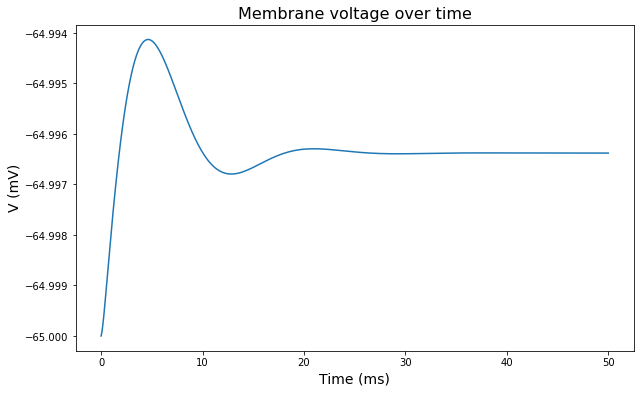

In [4]:
t_max = 50 # ms
t = np.arange(0,t_max,dt) # ms

# Using first an external current of 0 
Ie = np.zeros(len(t))

V_a,t,n,m,h,I_na,I_k = hod_hux(n_0,m_0,h_0,V_0,Ie,Cm,dt,t_max)

fig = plt.figure(figsize=(10,6))
plt.plot(t,V_a)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.title('Membrane voltage over time',fontsize=16)
plt.xlabel('Time (ms)',fontsize=14)
plt.ylabel('V (mV)',fontsize=14);

### b) Apply now a constant external current.

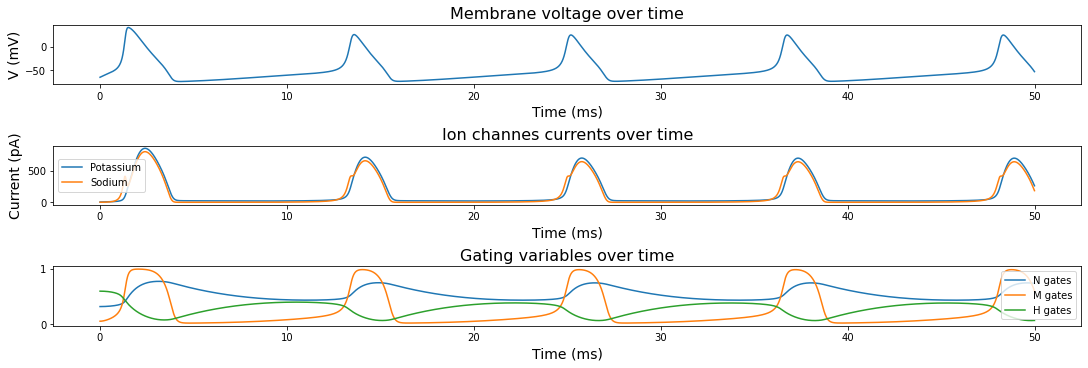

In [5]:
t_max = 50 # ms
t = np.arange(0,t_max,dt) # ms

# Applying now an external positive current
Ie_b = 20e-9*np.ones(len(t)) # mA

V_b,t,n_b,m_b,h_b,I_na_b,I_k_b = hod_hux(n_0,m_0,h_0,V_0,Ie_b,Cm,dt,t_max)
    
fig, ax = plt.subplots(figsize=(15, 5,),nrows=3, ncols=1, constrained_layout=True)

ax[0].set_title('Membrane voltage over time',fontsize=16)
ax[0].set_xlabel('Time (ms)',fontsize=14)
ax[0].set_ylabel('V (mV)',fontsize=14);
ax[0].plot(t,V_b)
ax[0] = plt.gca()
ax[0].ticklabel_format(useOffset=False)

ax[1].set_title('Ion channes currents over time',fontsize=16)
ax[1].plot(t[0:-1],I_k_b*10**9,label='Potassium')
ax[1].plot(t[0:-1],-I_na_b*10**9,label='Sodium')
ax[1].set_xlabel('Time (ms)',fontsize=14)
ax[1].set_ylabel('Current (pA)',fontsize=14);
ax[1].legend()

ax[2].set_title('Gating variables over time',fontsize=16)
ax[2].set_xlabel('Time (ms)',fontsize=14)

ax[2].plot(t,n_b,label='N gates')
ax[2].plot(t,m_b,label='M gates')
ax[2].plot(t,h_b,label='H gates')
ax[2].legend();

#### Discuss the influence of the different currents at different phases of the action potential, and how these are related to the dynamics of the gating variables.

It can be seen that the m-gates are activated very fast, at the same time as the steepest decrease of the number of h-gates. That induces the fast activation of the soidum currents, which exhibits a fast increase and then a small stabilization followed by a bell-like distribution.

Regarding the potassium channels, the n-gates follow a more smooth activation and deactivation. However, the current of this channels is 0 even for very big values of n-gates (they are always bigger than ~0.4). 

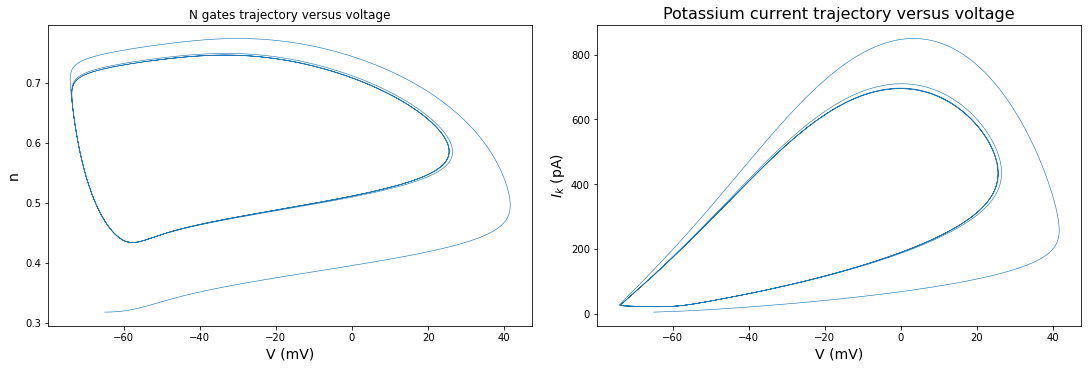

In [6]:
fig, ax = plt.subplots(figsize=(15, 5,),nrows=1, ncols=2, constrained_layout=True)

ax[0].plot(V_b,n_b,linewidth=0.6)
ax[0].set_xlabel('V (mV)',fontsize=14)
ax[0].set_ylabel('n',fontsize=14);
ax[0].set_title('N gates trajectory versus voltage')

ax[1].plot(V_b[0:-1],I_k_b*10**9,linewidth=0.6)
ax[1].set_ylabel(r'$I_{k}$'+' (pA)',fontsize=14)
ax[1].set_xlabel('V (mV)',fontsize=14);
ax[1].set_title('Potassium current trajectory versus voltage',fontsize=16);

#### Please interpret your results.

It can be seen that these trajectories are recirculating, as when the system stabilizes and produce a periodic action potenital, same values of n and Ik appear in the system. That is why we have overlapping curves. The line which is non-overlapped represents in both plots the initialization stage, in which the first AP carries a higher magnitude than the following ones.

### c) Plot the firing rate of the model as a function of Ie.

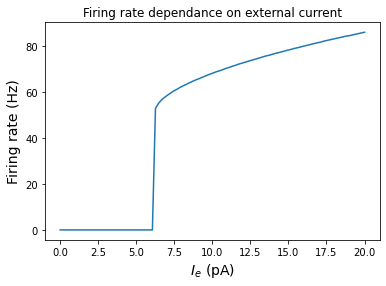

In [7]:
Ie_c= np.linspace(0,20.001,100)*10**(-9) # mA

t_max = 100 # ms
t = np.arange(0,t_max,dt)

fire_rate_1c = np.zeros(len(Ie_c))

for i in range(0,len(Ie_c)):
    
    Ie = Ie_c[i]*np.ones(len(t))
    
    V_c,t, n,m,h,I_na,I_k= hod_hux(n_0,m_0,h_0,V_0,Ie,Cm,dt,t_max)

    in_peaks,prop = find_peaks(V_c,height=-0.005)

    if len(in_peaks)>3:
        fire_rate_isi_mean = np.zeros(len(in_peaks)-1)

        for p in range (0,len(in_peaks)-1):
            fire_rate_isi_mean[p] =(in_peaks[p+1]-in_peaks[p])*dt

        fire_rate_1c[i] = round(1/np.mean(fire_rate_isi_mean),4)*1000 # ms to s

plt.plot(Ie_c*10**9,fire_rate_1c)
plt.title('Firing rate dependance on external current')
plt.xlabel(r'$I_{e}$'+' (pA)',fontsize=14)
plt.ylabel('Firing rate (Hz)',fontsize=14);

#### Show that the firing rate jumps discontinuously from zero to a finite value when the current exceeds a certain value (’rheobase’). What is the approximate value of the rheobase? What is the difference to the firing rate curve you obtained for the leaky integrate-and-fire model in the fifth sheet? 

In [8]:
num = 0

while fire_rate_1c[num]==0:
    num += 1

thresh=round(Ie_c[num-1]*10**9,2)
print('The rheobase has an approximate value of ' + str(thresh) + ' pA.')

The rheobase has an approximate value of 6.06 pA.


In the case of the last sheet, approximately 2.6 nA were needed to elicit an AP on the neuron, which is three orders of magnitude higher than the one required here. That means that this model is more sensitive to external input currents.

Also, we can observe here a discontinuity in the jump from 0 to ~55 Hz of firing rate once the rheobase current is surpassed. This is a general condition of type II neurons (opossed to the type I neurons without such jump seen in Sheet 05).

###  d) Apply a negative current followed by Ie = 0 pA and see what happens.

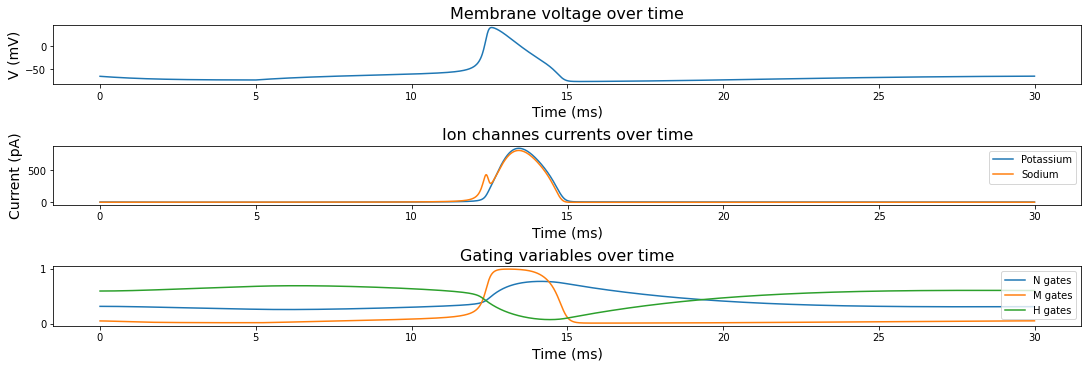

In [9]:
t_max = 30
dt= 0.01

t=np.arange(0,t_max,dt) # ms
num = 0
Ie_d = np.zeros(len(t))

while t[num]<5:
    Ie_d[num] = -5e-9
    num += 1

V_d,t,n_d,m_d,h_d,I_na_d,I_k_d = hod_hux(n_0,m_0,h_0,V_0,Ie_d,Cm,dt,t_max)

fig, ax = plt.subplots(figsize=(15, 5,),nrows=3, ncols=1, constrained_layout=True)

ax[0].set_title('Membrane voltage over time',fontsize=16)
ax[0].set_xlabel('Time (ms)',fontsize=14)
ax[0].set_ylabel('V (mV)',fontsize=14);
ax[0].plot(t,V_d)
ax[0] = plt.gca()
ax[0].ticklabel_format(useOffset=False)

ax[1].set_title('Ion channes currents over time',fontsize=16)
ax[1].plot(t[0:-1],I_k_d*10**9,label='Potassium')
ax[1].plot(t[0:-1],-I_na_d*10**9,label='Sodium')
ax[1].set_xlabel('Time (ms)',fontsize=14)
ax[1].set_ylabel('Current (pA)',fontsize=14);
ax[1].legend()

ax[2].set_title('Gating variables over time',fontsize=16)
ax[2].set_xlabel('Time (ms)',fontsize=14)
ax[2].plot(t,n_d,label='N gates')
ax[2].plot(t,m_d,label='M gates')
ax[2].plot(t,h_d,label='H gates')
ax[2].legend();

#### Explain the obtained result.

I realised that having a longer time than 5 ms for the -5 pA was more useful for explanation purposes, so I recreated a new paradigm. 

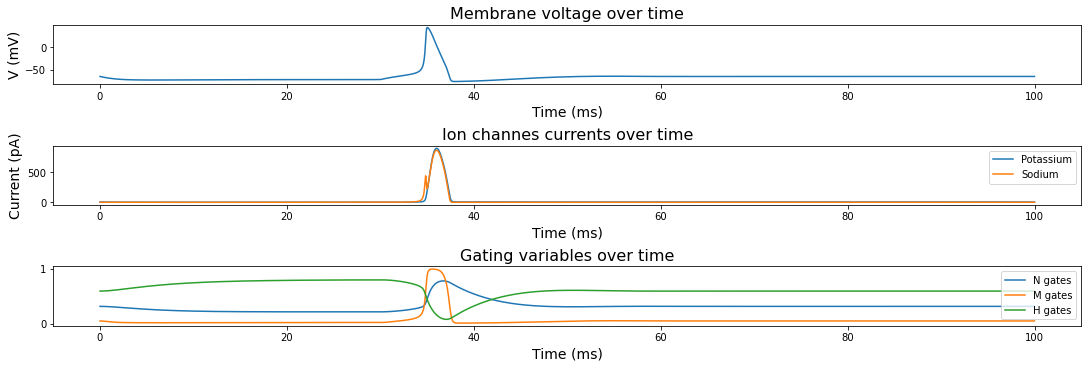

In [10]:
t_max = 100
dt= 0.01

t=np.arange(0,t_max,dt) # ms
num = 0
Ie_d = np.zeros(len(t))

# Applying the -5 pA current for a higher time (30 ms)

while t[num]<30:
    Ie_d[num] = -5e-9 # mA
    num += 1

V_d,t,n_d,m_d,h_d,I_na_d,I_k_d = hod_hux(n_0,m_0,h_0,V_0,Ie_d,Cm,dt,t_max)

fig, ax = plt.subplots(figsize=(15, 5,),nrows=3, ncols=1, constrained_layout=True)

ax[0].set_title('Membrane voltage over time',fontsize=16)
ax[0].set_xlabel('Time (ms)',fontsize=14)
ax[0].set_ylabel('V (mV)',fontsize=14);
ax[0].plot(t,V_d)
ax[0] = plt.gca()
ax[0].ticklabel_format(useOffset=False)

ax[1].set_title('Ion channes currents over time',fontsize=16)
ax[1].plot(t[0:-1],I_k_d*10**9,label='Potassium')
ax[1].plot(t[0:-1],-I_na_d*10**9,label='Sodium')
ax[1].set_xlabel('Time (ms)',fontsize=14)
ax[1].set_ylabel('Current (pA)',fontsize=14);
ax[1].legend()

ax[2].set_title('Gating variables over time',fontsize=16)
ax[2].set_xlabel('Time (ms)',fontsize=14)
ax[2].plot(t,n_d,label='N gates')
ax[2].plot(t,m_d,label='M gates')
ax[2].plot(t,h_d,label='H gates')
ax[2].legend();

It can be seen that the action potential arises from the point in which the current is taken out: the AP is produced due to the change in current and not because of the current itself.

Setting that current to that value produces the stabilization of the gating variables to a steady state value. However, when that current is removed, their values change and the action potential is produced. After that, new steady-state values are produced so that the membrane reaches a steady-state voltage and the current throught the channels is 0. 

### e) Drive your Hodgkin-Huxley neuron with an external sinusoidal current. 

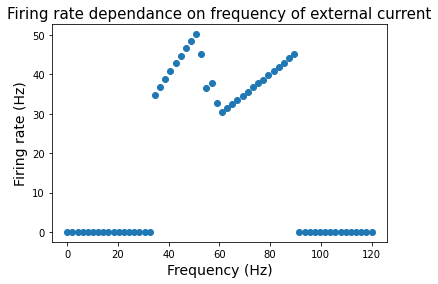

In [11]:
I_0 = 2e-9 
t_max = 200
freq = np.linspace(0,0.12,60) # KHz

t=np.arange(0,t_max,dt) # ms

fire_rate_1e = np.zeros(len(freq))

for j in range(0,len(freq)):
    
    Ie = I_0*np.sin(2*np.pi*freq[j]*t)
    V_e,t, n_e,m_e,h_e,I_na,I_k= hod_hux(n_0,m_0,h_0,V_0,Ie,Cm,dt,t_max)
    
    if j==10:
        n_low = n_e
        h_low = h_e
        m_low = m_e
        
    elif j==20:
        n_arm1 = n_e
        h_arm1 = h_e
        m_arm1 = m_e
        
    elif j==40:
        n_arm2 = n_e
        h_arm2 = h_e
        m_arm2 = m_e
    
    elif j==59:
        n_high = n_e
        h_high = h_e
        m_high = m_e
    
    in_peaks,prop = find_peaks(V_e,height=0)

    if len(in_peaks)>1:
        fire_rate_isi_mean = np.zeros(len(in_peaks)-1)

        for p in range (0,len(in_peaks)-1):
            fire_rate_isi_mean[p] =(in_peaks[p+1]-in_peaks[p])*dt

        fire_rate_1e[j] = round(1/np.mean(fire_rate_isi_mean),4)*1000 # ms to s

plt.scatter(freq*1000,fire_rate_1e)
plt.title('Firing rate dependance on frequency of external current',fontsize=15)
plt.xlabel('Frequency (Hz)',fontsize=14)
plt.ylabel('Firing rate (Hz)',fontsize=14);

#### What do you observe? Why? To explain the phenomena you observe, you can provide plots of the time course of quantities you deem appropriate (e.g. voltage, currents, gating variables) for some representative frequencies.

In [12]:
arm1= round(fire_rate_1e[20],1)
arm2= round(fire_rate_1e[40],1)
arm_f1=round(freq[20]*1000,1)
arm_f2=round(freq[40]*1000,1)

num = 0

while fire_rate_1e[num]==0:
    num += 1
    
thresh_1=round(freq[num]*1000,1)

while fire_rate_1e[num]>0:
    num += 1

thresh_2=round(freq[num]*1000,1)
print('Firing rates over zero appear from '+str(thresh_1) + 
      ' Hz to '+ str(thresh_2) + ' Hz.')

Firing rates over zero appear from 34.6 Hz to 91.5 Hz.


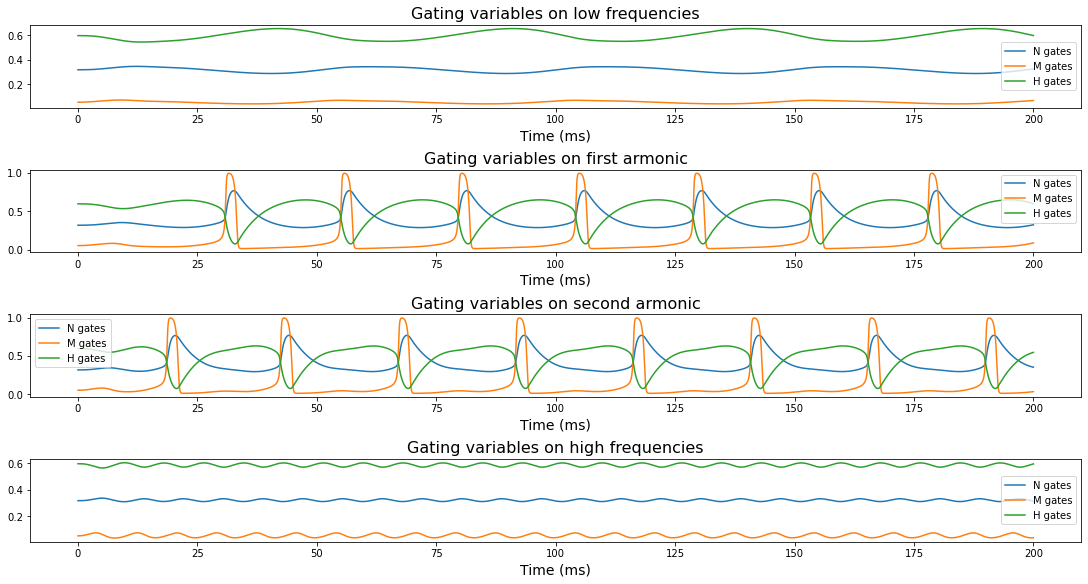

In [13]:
fig, ax = plt.subplots(figsize=(15, 8,),nrows=4, ncols=1, constrained_layout=True)

ax[0].set_title('Gating variables on low frequencies',fontsize=16)
ax[0].set_xlabel('Time (ms)',fontsize=14)
ax[0].plot(t,n_low,label='N gates')
ax[0].plot(t,m_low,label='M gates')
ax[0].plot(t,h_low,label='H gates')
ax[0].legend();

ax[1].set_title('Gating variables on first armonic',fontsize=16)
ax[1].set_xlabel('Time (ms)',fontsize=14)
ax[1].plot(t,n_arm1,label='N gates')
ax[1].plot(t,m_arm1,label='M gates')
ax[1].plot(t,h_arm1,label='H gates')
ax[1].legend();

ax[2].set_title('Gating variables on second armonic',fontsize=16)
ax[2].set_xlabel('Time (ms)',fontsize=14)
ax[2].plot(t,n_arm2,label='N gates')
ax[2].plot(t,m_arm2,label='M gates')
ax[2].plot(t,h_arm2,label='H gates')
ax[2].legend();

ax[3].set_title('Gating variables on high frequencies',fontsize=16)
ax[3].set_xlabel('Time (ms)',fontsize=14)
ax[3].plot(t,n_high,label='N gates')
ax[3].plot(t,m_high,label='M gates')
ax[3].plot(t,h_high,label='H gates')
ax[3].legend();

In [14]:
print('The firing rate of the 1st armonic ('+str(arm_f1)+') is '
      + str(arm1))
print('The firing rate of the 2nd armonic ('+str(arm_f2)+') is '
      + str(arm2))

The firing rate of the 1st armonic (40.7) is 40.8
The firing rate of the 2nd armonic (81.4) is 40.9


It can be seen that the gating variables follow a oscillatory behavior in low (until 34.6 Hz) and in high frequencies (from 91.5 Hz). That makes the firing rate 0 as no peaks can be produced. In the low frequencies cases, the changes are so slow that no action potential can be included, in the high ones, the changes are too fast for an action potential to occur.

It can be seen that, there exists two slopes, with two armonical slopes: the firing rates of the first slope (1st armonic) are equal to the frequencies of the input current, while in the second slope (2nd armonic), the firing rates are equal to half the frequency of the input current.